# Analyse the molecule inverse design models

In [49]:
%reload_ext autoreload
%autoreload 2

In [304]:
from gpt3forchem.molecules.analysis import analyze_completion, extract_mol_text_from_completion, get_trainingset_distance, get_composition_from_string, get_distance_cont, get_log_p_from_string, get_bin, get_distance
from gpt3forchem.query_model import query_gpt3
from pycm import ConfusionMatrix
import pandas as pd

import joblib

from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit import DataStructs

import seaborn as sns 
import matplotlib.pyplot as plt

import numpy as np 

from sklearn.metrics import roc_auc_score

plt.style.use(['science', 'nature'])

In [57]:
valid_filename = 'run_files/2022-07-18-14-18-55_valid_inverse_prompts_mols_7131.jsonl'
test_prompts = pd.read_json(valid_filename, lines=True)

In [58]:
train_filename = 'run_files/2022-07-18-14-18-55_train_inverse_prompts_mols_10695.jsonl'

In [59]:
train_prompts = pd.read_json(train_filename, lines=True)

In [60]:
train_smiles = [extract_mol_text_from_completion(x) for x in train_prompts['completion']]

In [180]:
train_fps = [AllChem.GetMorganFingerprint(Chem.MolFromSmiles(x), 4,useFeatures=True, useCounts=True) for x in train_smiles]

[09:33:42] WARNING: not removing hydrogen atom without neighbors
[09:33:42] WARNING: not removing hydrogen atom without neighbors
[09:33:42] WARNING: not removing hydrogen atom without neighbors
[09:33:42] WARNING: not removing hydrogen atom without neighbors
[09:33:42] WARNING: not removing hydrogen atom without neighbors
[09:33:42] WARNING: not removing hydrogen atom without neighbors
[09:33:42] WARNING: not removing hydrogen atom without neighbors
[09:33:43] WARNING: not removing hydrogen atom without neighbors
[09:33:43] WARNING: not removing hydrogen atom without neighbors
[09:33:43] WARNING: not removing hydrogen atom without neighbors
[09:33:43] WARNING: not removing hydrogen atom without neighbors
[09:33:43] WARNING: not removing hydrogen atom without neighbors
[09:33:43] WARNING: not removing hydrogen atom without neighbors
[09:33:43] WARNING: not removing hydrogen atom without neighbors
[09:33:43] WARNING: not removing hydrogen atom without neighbors
[09:33:43] WARNING: not r

In [5]:
completions_0 = query_gpt3("ada:ft-epfl-2022-07-18-12-34-58", test_prompts.iloc[:500], max_tokens=350)

In [105]:
completions_05 = query_gpt3("ada:ft-epfl-2022-07-18-12-34-58", test_prompts.iloc[:500], max_tokens=350, temperature=0.5)

In [109]:
completions_1 = query_gpt3("ada:ft-epfl-2022-07-18-12-34-58", test_prompts.iloc[:500], max_tokens=350, temperature=1.0)

In [340]:
completions_2 = query_gpt3("ada:ft-epfl-2022-07-18-12-34-58", test_prompts.iloc[:500], max_tokens=350, temperature=2.0)

In [7]:
joblib.dump(completions_0, 'run_files/2022-07-18-14-18-55_inverse_completions_0.pkl')

['run_files/2022-07-18-14-18-55_inverse_completions_0.pkl']

In [110]:
joblib.dump(completions_05, 'run_files/2022-07-18-14-18-55_inverse_completions_05.pkl')

['run_files/2022-07-18-14-18-55_inverse_completions_05.pkl']

In [111]:
joblib.dump(completions_1, 'run_files/2022-07-18-14-18-55_inverse_completions_1.pkl')

['run_files/2022-07-18-14-18-55_inverse_completions_1.pkl']

In [341]:
joblib.dump(completions_2, 'run_files/2022-07-18-14-18-55_inverse_completions_2.pkl')

['run_files/2022-07-18-14-18-55_inverse_completions_2.pkl']

In [343]:
metrics_0 = []

for i in range(500): 
    metrics_0.append(analyze_completion(test_prompts.iloc[i]['prompt'], completions_0[i], train_fps))

metrics_05 = []

for i in range(500): 
    metrics_05.append(analyze_completion(test_prompts.iloc[i]['prompt'], completions_05[i], train_fps))

metrics_1 = []

for i in range(500): 
    metrics_1.append(analyze_completion(test_prompts.iloc[i]['prompt'], completions_1[i], train_fps))

metrics_2 = []

for i in range(500): 
    metrics_2.append(analyze_completion(test_prompts.iloc[i]['prompt'], completions_2[i], train_fps))




[11:57:18] SMILES Parse Error: unclosed ring for input: 'C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2OC(=O)C4=CN=CC=C4)CCC5=CC=CC=C5'
[11:57:18] SMILES Parse Error: unclosed ring for input: 'C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2OC(=O)C4=CN=CC=C4)CCC5=CC=CC=C5'
[11:57:18] SMILES Parse Error: unclosed ring for input: 'C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2OC(=O)C4=CN=CC=C4)CCC5=CC=CC=C5'
[11:57:18] SMILES Parse Error: unclosed ring for input: 'C[C@H]1CN(C2=CC=CC=C2C3=CC=CC=C3)CC[C@@H]4[C@@H]1C[C@H](C4)O[C@H]4C5=CC=CC=C5'
[11:57:18] SMILES Parse Error: unclosed ring for input: 'C[C@H]1CN(C2=CC=CC=C2C3=CC=CC=C3)CC[C@@H]4[C@@H]1C[C@H](C4)O[C@H]4C5=CC=CC=C5'
[11:57:18] SMILES Parse Error: unclosed ring for input: 'C[C@H]1CN(C2=CC=CC=C2C3=CC=CC=C3)CC[C@@H]4[C@@H]1C[C@H](C4)O[C@H]4C5=CC=CC=C5'
[11:57:18] SMILES Parse Error: unclosed ring for input: 'C1=CC=C2C(=C1)C(=O)C3=C4C5=C6C(=CC=C5C=C4)C7=C2C8=CC=CC=C8O7'
[11:57:18] SMILES Parse Error: unclosed ring for input: 'C1=CC=C2C(=C1)C(=O)C3=C4C5=C6C(=CC=

In [344]:
df_metrics_0 = pd.DataFrame(metrics_0)
df_metrics_05 = pd.DataFrame(metrics_05)
df_metrics_1 = pd.DataFrame(metrics_1)
df_metrics_2 = pd.DataFrame(metrics_2)

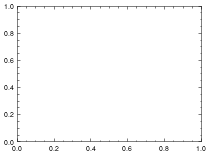

In [335]:
fig, ax = plt.subplots()
width = fig.get_figwidth()
height = fig.get_figheight()

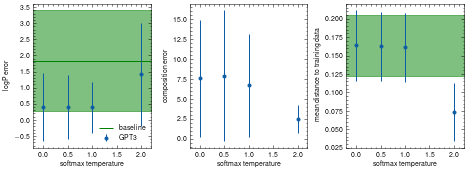

In [350]:
fig, ax = plt.subplots(1,3, sharex="all", figsize=(width*2, height))
temps = [0, 0.5, 1, 2]
# Plot the error in the predictions as a function of temperature
baseline_mean = np.mean(losses_random_smiles[:500])
baseline_std = np.std(losses_random_smiles[:500])
distance_mean = [df_metrics_0['distance'].mean(), df_metrics_05['distance'].mean(), df_metrics_1['distance'].mean(), df_metrics_2['distance'].mean()]
distance_std = [df_metrics_0['distance'].std(), df_metrics_05['distance'].std(), df_metrics_1['distance'].std(), df_metrics_2['distance'].std()]

ax[0].errorbar(temps, distance_mean, yerr=distance_std, fmt='o', label='GPT3')
ax[0].fill_between([-0.5, 2.5], [baseline_mean - baseline_std], [baseline_mean + baseline_std], color='g', alpha=0.5)
ax[0].hlines(baseline_mean, -.5, 2.5, color='g', label='baseline')

# Plot the error in the composition as a function of temperature
composition_error_mean = [df_metrics_0['mean'].mean(), df_metrics_05['mean'].mean(), df_metrics_1['mean'].mean(), df_metrics_2['mean'].mean()]
composition_error_std = [df_metrics_0['mean'].std(), df_metrics_05['mean'].std(), df_metrics_1['mean'].std(), df_metrics_2['mean'].std()]

ax[1].errorbar(temps, composition_error_mean, yerr=composition_error_std, fmt='o')

# Plot the distance to the training data as a function of temperature 
distances_mean = [df_metrics_0['mean_trainingset_distance'].mean(), df_metrics_05['mean_trainingset_distance'].mean(), df_metrics_1['mean_trainingset_distance'].mean(), df_metrics_2['mean_trainingset_distance'].mean()]
distances_std = [df_metrics_0['mean_trainingset_distance'].std(), df_metrics_05['mean_trainingset_distance'].std(), df_metrics_1['mean_trainingset_distance'].std(), df_metrics_2['mean_trainingset_distance'].std()]

distances_mean_valid = df_valid_distances['mean_trainingset_distance'].mean()
distances_std_valid = df_valid_distances['mean_trainingset_distance'].std()

ax[2].errorbar(temps, distances_mean, yerr=distances_std, fmt='o')
ax[2].fill_between([-0.5, 2.5], [distances_mean_valid - distances_std_valid], [distances_mean_valid + distances_std_valid], color='g', alpha=0.5)

ax[0].legend(loc='lower right')
for a in ax:
    a.set_xlabel('softmax temperature')
    a.set_xlim(-0.2, 2.2)

ax[0].set_ylabel('logP error')
ax[1].set_ylabel('composition error')
ax[2].set_ylabel('mean distance to training data')

fig.tight_layout()
fig.savefig('2022-07-18-14-18-55_inverse_metrics.pdf', bbox_inches='tight')

In [160]:
valid_smiles = [extract_mol_text_from_completion(x) for x in test_prompts['completion']]

In [181]:
valid_train_distances = []

for valid_smile in valid_smiles: 
    valid_train_distances.append(get_trainingset_distance(valid_smile, train_fps))

[09:34:15] WARNING: not removing hydrogen atom without neighbors
[09:34:15] WARNING: not removing hydrogen atom without neighbors
[09:34:15] WARNING: not removing hydrogen atom without neighbors
[09:34:23] WARNING: not removing hydrogen atom without neighbors
[09:34:32] WARNING: not removing hydrogen atom without neighbors
[09:34:32] WARNING: not removing hydrogen atom without neighbors
[09:34:32] WARNING: not removing hydrogen atom without neighbors
[09:34:40] WARNING: not removing hydrogen atom without neighbors


In [174]:
df_valid_distances

,min_trainingset_distance,max_trainingset_distance,mean_trainingset_distance,median_trainingset_distance
0,0.0,1.000000,0.133847,0.113475
1,0.0,0.621951,0.132182,0.118343
2,0.0,0.754098,0.197196,0.181818
3,0.0,0.820513,0.136259,0.120000
4,0.0,0.607595,0.140895,0.134615
...,...,...,...,...
7113,0.0,1.000000,0.208587,0.203704
7114,0.0,0.697674,0.136356,0.126984
7115,0.0,0.800000,0.103694,0.102190
7116,0.0,0.666667,0.101554,0.082474


In [166]:
get_trainingset_distance(valid_smile, train_fps)

{'min_trainingset_distance': 0.0,
 'max_trainingset_distance': 1.0,
 'mean_trainingset_distance': 0.07373437775592168,
 'median_trainingset_distance': 0.05102040816326531}

In [176]:
valid_canonical_smiles = [Chem.MolToSmiles(Chem.MolFromSmiles(x)) for x in valid_smiles]
train_canonical_smiles = [Chem.MolToSmiles(Chem.MolFromSmiles(x)) for x in train_smiles]

[09:26:29] WARNING: not removing hydrogen atom without neighbors
[09:26:29] WARNING: not removing hydrogen atom without neighbors
[09:26:29] WARNING: not removing hydrogen atom without neighbors
[09:26:29] WARNING: not removing hydrogen atom without neighbors
[09:26:29] WARNING: not removing hydrogen atom without neighbors
[09:26:29] WARNING: not removing hydrogen atom without neighbors
[09:26:29] WARNING: not removing hydrogen atom without neighbors
[09:26:29] WARNING: not removing hydrogen atom without neighbors
[09:26:30] WARNING: not removing hydrogen atom without neighbors
[09:26:30] WARNING: not removing hydrogen atom without neighbors
[09:26:30] WARNING: not removing hydrogen atom without neighbors
[09:26:30] WARNING: not removing hydrogen atom without neighbors
[09:26:30] WARNING: not removing hydrogen atom without neighbors
[09:26:30] WARNING: not removing hydrogen atom without neighbors
[09:26:30] WARNING: not removing hydrogen atom without neighbors
[09:26:30] WARNING: not r

In [179]:
[smile for smile in train_canonical_smiles if smile in valid_canonical_smiles]

['CC(C)=C[C@H](O)C[C@@H](C)[C@H]1CC[C@@]2(C)[C@@H]3[C@@H](O)C=C4[C@@H](CC[C@H](O)[C@]4(C)CO)[C@]3(C)CC[C@]12C',
 'CC(=O)OCC(COC(C)=O)OC(C)=O',
 'CC(C)=CCC/C(C)=C/C(=O)O',
 'C/C(=C\\CC[C@@H](C)[C@H]1CC[C@@]2(C)C3=CC[C@H]4C(C)(C)[C@@H](O)CC[C@]4(C)C3=CC[C@]12C)CO',
 'C/C=C(/CC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4C[C@@H](O)CC[C@]4(C)[C@H]3CC[C@@]21C)C(C)C',
 'C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C@@H]2O',
 'O=C(/C=C/c1ccc(O)c(O)c1)O[C@@H]1O[C@H](COC(=O)[C@H]2CC(=O)c3oc(=O)c4cc(O)c(O)c(O)c4c32)[C@@H](O)[C@H](O)[C@H]1O',
 '[N-]=[N+]=O',
 'COC(=O)C12OCC34C(CC5C(C)=CC(=O)C(O)C5(C)C3C(O)C1O)OC(=O)C(OC(=O)c1ccccc1)C24',
 'I',
 'O=c1cc[nH]c(=S)[nH]1',
 'C#CC1(O)CCC2C3CCC4=CC(=NO)CCC4C3CCC21CC.C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C',
 'CC12CCC3c4ccc(O)cc4CCC3C1CC(O)C2O',
 'CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[C@@H](N)CSSC[C@@H](C(=O)N2CCC[C@H]2C(=O)N[C@@H](CC(C)C)C(=O)NCC(N)=O)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CCC(N)=O)NC1=O',
 'S1SSSSSSS1',
 'NC[C@H](O)c1ccc(O)c(O)c1',
 'O[C@@H]1C[C

#### As a baseline for the molecular generation, we generate random SELFIES that fulfil the composition contraints.

In [182]:
import selfies as sf

In [183]:
alphabet = sf.get_semantic_robust_alphabet()

In [185]:
composition_symbol_map = {
    "C": "[C]",
    "N": "[N]",
    "H": "[H]",
    "O": "[O]",
    "P": "[P]",
    "S": "[S]",
}

In [191]:
additional_symbols = []

for symbol in alphabet: 
    has_element = False
    for element in composition_symbol_map.keys():
        if element in symbol:
            has_element = True
            break
    if not has_element:
        additional_symbols.append(symbol)

In [274]:
import random
def generate_random_selfies(composition, max_additional_symbols=5, sample_from_all: bool = False):
    pool = []
    alpha = list(sf.get_semantic_robust_alphabet())
    for k, v in composition.items(): 
        pool.extend([f'[{k}]'] * v)
    
    for i in range(random.randint(0, max_additional_symbols)):
        if sample_from_all:
            pool.append(random.choice(alpha))
        else:
            pool.append(random.choice(additional_symbols))
    
    return "".join(random.sample(pool, len(pool)))


In [275]:
requested_compositions = [get_composition_from_string(s, ["C", "H", "O", "N", "P", "S"]) for s in test_prompts['prompt']]

In [317]:
random_selfies = [generate_random_selfies(c, sample_from_all=False) for c in requested_compositions]

In [318]:
random_smiles = [sf.decoder(s) for s in random_selfies]

In [319]:
logP_of_random_smiles = [Chem.Crippen.MolLogP(Chem.MolFromSmiles(s)) for s in random_smiles]

[10:37:04] WARNING: not removing hydrogen atom without neighbors
[10:37:04] WARNING: not removing hydrogen atom without neighbors
[10:37:04] WARNING: not removing hydrogen atom without neighbors
[10:37:04] WARNING: not removing hydrogen atom without neighbors
[10:37:04] WARNING: not removing hydrogen atom without neighbors
[10:37:04] WARNING: not removing hydrogen atom without neighbors
[10:37:04] WARNING: not removing hydrogen atom without neighbors
[10:37:04] WARNING: not removing hydrogen atom without neighbors
[10:37:04] WARNING: not removing hydrogen atom without neighbors
[10:37:04] WARNING: not removing hydrogen atom without neighbors
[10:37:04] WARNING: not removing hydrogen atom without neighbors
[10:37:04] WARNING: not removing hydrogen atom without neighbors
[10:37:04] WARNING: not removing hydrogen atom without neighbors
[10:37:04] WARNING: not removing hydrogen atom without neighbors
[10:37:04] WARNING: not removing hydrogen atom without neighbors
[10:37:04] WARNING: not r

In [320]:
expected_logP = [get_log_p_from_string(s) for s in test_prompts['prompt']]

In [321]:
predicted_logP = [get_bin(s) for s in logP_of_random_smiles]

In [322]:
losses_random_smiles = [get_distance(p, e) for p, e in zip(logP_of_random_smiles, expected_logP)]

In [300]:
cm = ConfusionMatrix(expected_logP, predicted_logP)

In [301]:
print(cm)

Predict   0         1         2         3         4         
Actual
0         768       639       13        3         0         

1         606       762       36        2         1         

2         621       785       35        6         0         

3         629       765       38        3         0         

4         595       747       54        9         1         





Overall Statistics : 

95% CI                                                            (0.2108,0.23006)
ACC Macro                                                         0.68817
ARI                                                               0.0025
AUNP                                                              0.51348
AUNU                                                              0.51352
Bangdiwala B                                                      0.11631
Bennett S                                                         0.02553
CBA                                                               0.0

In [ ]:
cm = ConfusionMatrix(expected_logP, predicted_logP)